# Advanced Matplotlib Concepts

In this lesson we will cover some advanced topics that you usually don't need as often as the basics you already learned. For more information you can always refer to the official documentation. The latter is also a useful tool in professional life to recall functionalities fresh in your mind.

In [1]:
# If necessary, restore the imports and sample data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

x = np.linspace(0, 5, 11)
y = x ** 2

### Logarithmic scale

We can also place logarithmic scales on one or both axes. This functionality is in effect just an application of a more general transformation in the Matplotlib system. Each axis can be defined individually by `set_xscale` or `set_yscale`. This method accepts one argument. In this case the argument *log*.

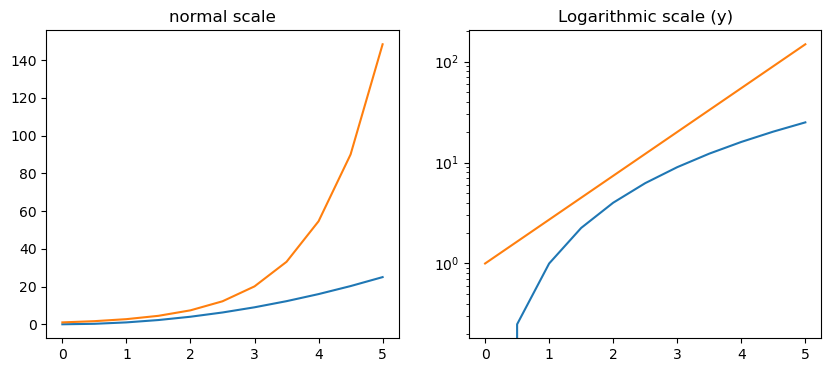

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

## Placement of division marks and user-defined division mark labels.

We can explicitly specify where we want to set the division sticks of an axis. To do this we use `set_xticks` and `set_yticks`, both of which take a list of values as arguments. Additionally, we can use the `set_xticklabels` and `set_yticklabels` method to add custom labels to the division marks.

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # LaTeX formatted caption

There are many other methods to set the graduation marks and their labels. These include various automatic methods for specifying the hyphens. You can find an overview at http://matplotlib.org/api/ticker_api.html.

### Scientific notation
With large numbers on the axes, it is often more useful to use the scientific notation:

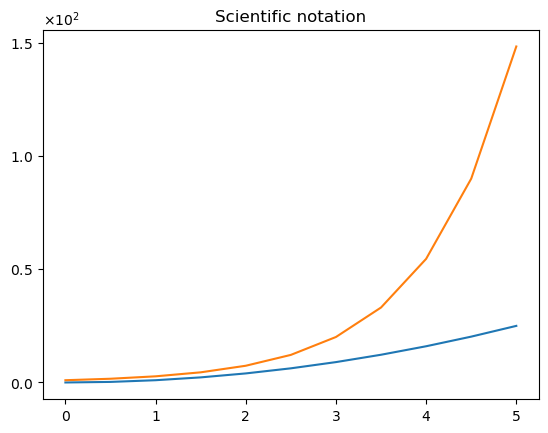

In [4]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

## Axes
### Axis number and axis label spacing

In [5]:
# Distance between x and y axis and the numbers on the axis
matplotlib.rcParams['xtick.major.pad'] = 10
matplotlib.rcParams['ytick.major.pad'] = 0

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Labeling and axis spacing")

# Distance between axis label and axis number
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 20

ax.set_xlabel("x")
ax.set_ylabel("y");

In [6]:
# Restore standards
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

### Axis position adjustment

Unfortunately, when we save diagrams, it sometimes happens that the label is cut off. Then it is necessary to adjust the position of the axes a little. We do this by using `subplots_adjust`:

In [7]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object we can switch grid or auxiliary lines on and off. We can also adjust their display. To do this, we use the same keywords as for the graphs.

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# Standard grid display
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# Custom grid display
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

# For the display in step style you can add to .grid() the parameter
# drawstyle='steps
# pass

### Axis lines

We can also edit the properties of our axis lines:

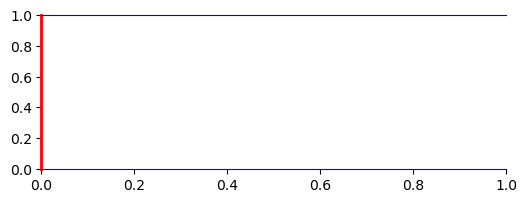

In [9]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# Switch off the line of the right axis
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # Show left graduation marks only

### Double axes

Sometimes it is useful to display an additional axis in a diagram. For example, when we want to plot curves with different units together. Motplotlib offers this possibility through the `twinx` and `twiny` functions:

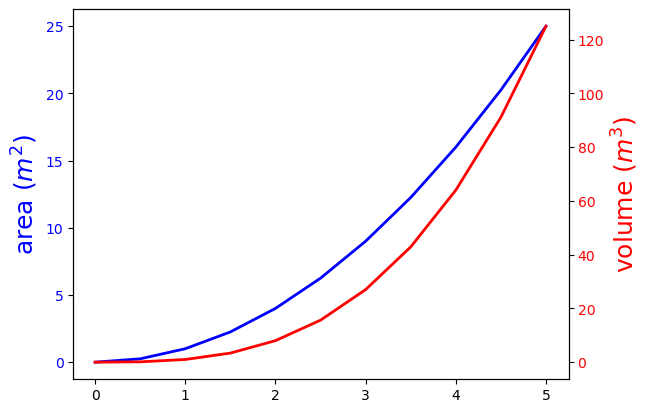

In [10]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y are zero

In [11]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # Set position of x axis to x = 0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))  # Set position of y axis to y = 0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Other 2D diagram types

In addition to the normal `plot` method, there are other functions to create various other types of diagrams. On the official Matplotlib website you can get a holistic overview of the diagram types at http://matplotlib.org/gallery.html. We'll look at some of the most useful ones now:

In [12]:
n = np.array([0,1,2,3,4,5])

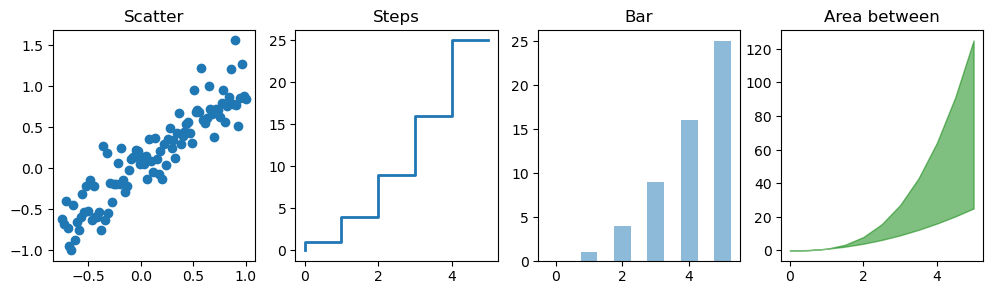

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("Scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("Steps")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("Bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("Area between");

## Text annotations

We can add annotations in Matplotlib by using the `text` function. LaTeX formatting is supported here, just as with axis labels and titles.

In [14]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Plots with multiple subplots and inserts

Axes can be added to the Matplotlib workspace manually by `fig.add_axes` or by subplot layout managers like `subplots`, `subplot2grid` and `gridspec`.

### subplots

In [15]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

### subplot2grid

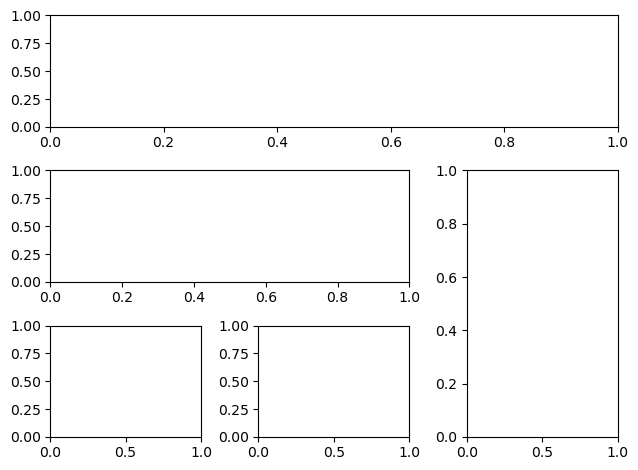

In [16]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### gridspec

In [17]:
import matplotlib.gridspec as gridspec

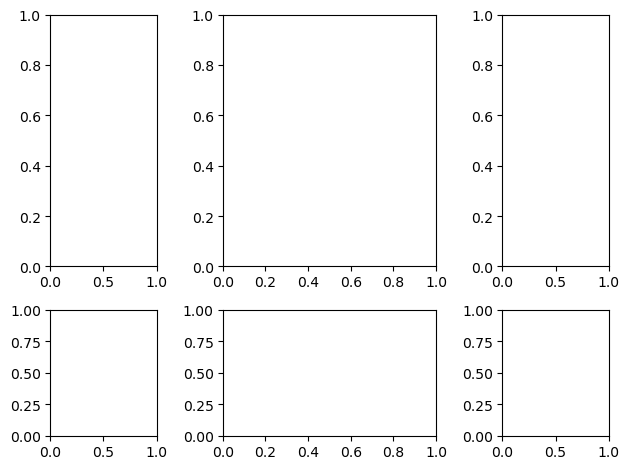

In [18]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### add_axes

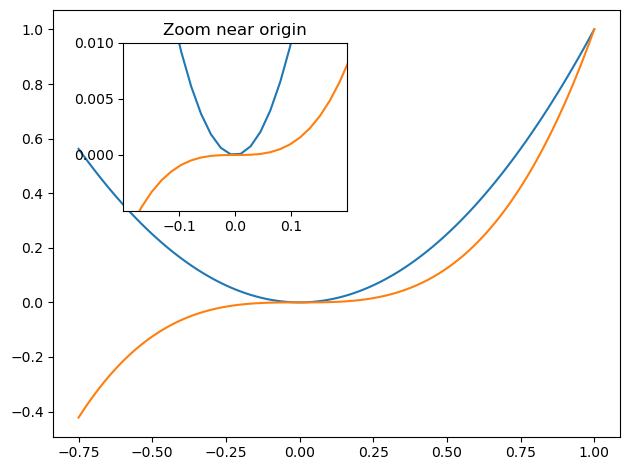

In [20]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('Zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Color map and contour plots

Color maps and contour plots are useful to represent functions with two variables. In most of these functions we use the color map to encode one dimension of the data.

There is a selection of predefined color maps. It is relatively self-explanatory to select a custom map. An overview of predefined color maps can be found at: https://matplotlib.org/examples/color/colormaps_reference.html.

In [21]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [22]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

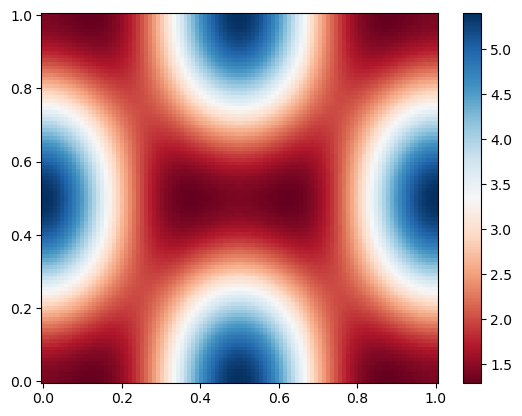

In [23]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

### imshow

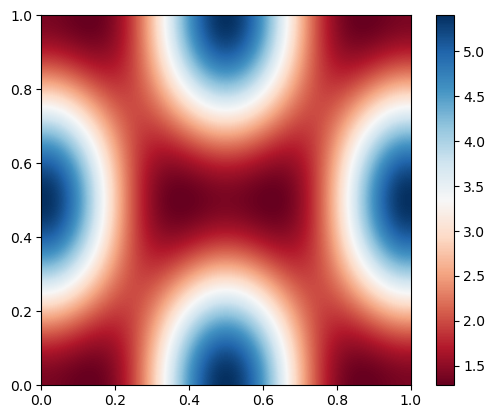

In [24]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

### Contours

In [25]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D diagrams

To use 3D plots in Matplotlib we first need to create an instance of the `Axes3D` class. Then 3D axes can be added to the workspace of Matplotlib just like 2D axes. Or more precisely: by passing the `projection=3d` argument and the `add_axes` or `add_subplot` method.

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Surface diagrams

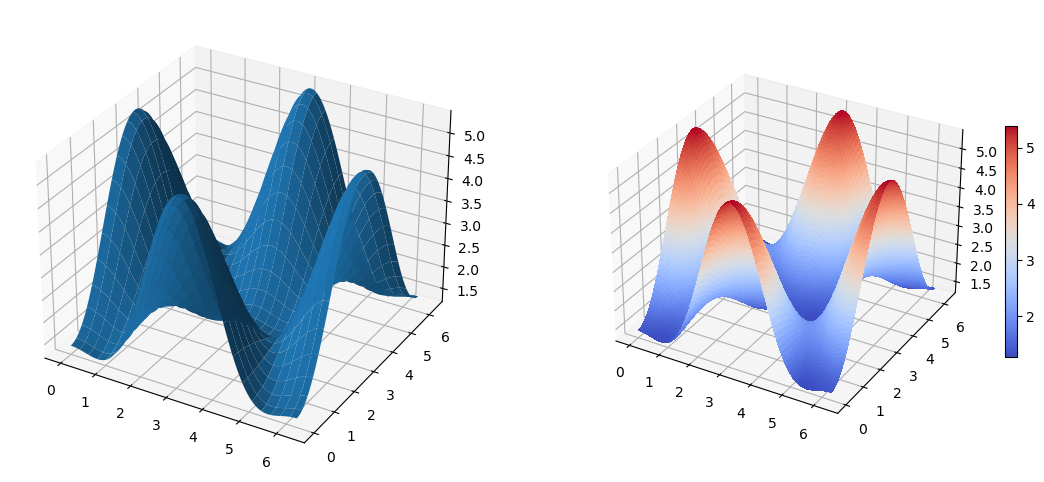

In [27]:
fig = plt.figure(figsize=(14,6))

# "ax" is a 3D axes insantz by the projection="3d" keyword
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Surface diagram with coloring and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### Wireframe diagram

In [28]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### Contour diagram with projections

In [29]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Other resources

* http://www.matplotlib.org - The website of Matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for Matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showing many types of diagrams that can be created with Matplotlib.

# 🏁 Recap Matplotlib advanced

- If you have finished the tasks and have no questions, start with `Task_2_Matplotlib`.
- If you have finished the tasks but would like to discuss the solutions together again, please tell your teacher!

<table style="width: 100%">
    <tr style="background: #ff9900">
        <td style="width: 100%">
            <div style="text-align:center; width: 100%; text-align:center"><font style="font-size:38px"><b>Good Job!</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>SoSe 2023</b></font></div>
        </td>
    </tr>
</table>